In [13]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# Load the MNIST dataset and split it into training and testing sets for model evaluation
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to a range between 0 and 1 to improve model training performance
print("Preprocessing the data...")
x_train = x_train / 255.0
x_test = x_test / 255.0

# Print a checkpoint message to track code execution and ensure it reaches this point without issues
print("Data preprocessing completed successfully.")


Loading MNIST dataset...
Preprocessing the data...
Data preprocessing completed successfully.


In [14]:
# Reshape the images to include a channel dimension (necessary for CNN input with grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Apply data augmentation to the training data (rotation, zoom, and shifts) to improve generalization
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# Print a message to confirm successful execution of the above steps
print("Data augmentation setup completed.")

Data augmentation setup completed.


In [15]:
# Define the CNN architecture with ReLU activation and L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
])

In [16]:
# Compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# Train the model on training set with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(x_test, y_test))

print("Model training completed successfully.")

Epoch 1/5


2024-09-09 09:34:56.384959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


938/938 [==============================] - 17s 18ms/step - loss: 0.5526 - accuracy: 0.9074 - val_loss: 0.3350 - val_accuracy: 0.9576
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2898 - accuracy: 0.9609 - val_loss: 0.2094 - val_accuracy: 0.9785
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.2374 - accuracy: 0.9662 - val_loss: 0.1711 - val_accuracy: 0.9835
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 0.2225 - accuracy: 0.9676 - val_loss: 0.1548 - val_accuracy: 0.9867
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.2087 - accuracy: 0.9710 - val_loss: 0.1384 - val_accuracy: 0.9900
Model training completed successfully.


In [7]:
# Function to recognize a handwritten digit from an image file
def recognize_digit(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to match the input shape expected by the model (28x28 pixels)
    img = cv2.resize(img, (28, 28))

    # Normalize the pixel values to the range [0, 1] for better prediction accuracy
    img = img / 255.0

    # Expand dimensions to match the model input (batch_size, height, width, channels)
    img = np.expand_dims(img, axis=0)

    # Use the trained model to predict the digit in the image
    prediction = model.predict(img)

    # Get the digit with the highest predicted probability
    digit = np.argmax(prediction)

    # Print the recognized digit
    print(f"Recognized digit: {digit}")

    return digit

# Indicate that the function has successfully recognized the digit
print("Digit recognition process completed successfully.")


Digit recognition process completed successfully.


1/1 [==============================] - 0s 77ms/step
Recognized digit: 1


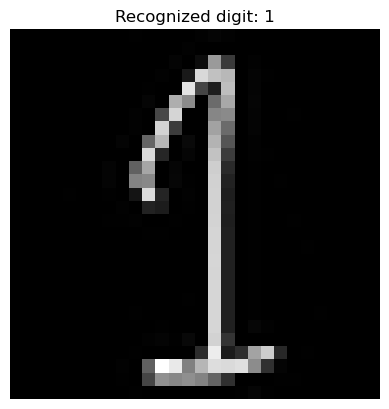

The recognized digit from the image '1.jpeg' is: 1


In [25]:
# Path to the folder where user-placed images are stored
user_images_folder = "user_images/"

# List image files in the user_images_folder
image_files = [f for f in os.listdir(user_images_folder) if os.path.isfile(os.path.join(user_images_folder, f))]

# Check if there are any images in the folder
if not image_files:
    print("No images found in the folder. Please place an image in the user_images folder.")
else:
    # Loop through all image files and recognize digits
    for image_to_recognize in image_files:
        image_path = os.path.join(user_images_folder, image_to_recognize)

        # Recognize the digit from the chosen image
        recognized_digit = recognize_digit(image_path)

        # Load and display the image with the recognized digit
        img = Image.open(image_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Recognized digit: {recognized_digit}")
        plt.show()

        # Inform the user about the recognized digit
        print(f"The recognized digit from the image '{image_to_recognize}' is: {recognized_digit}")


Text(0.5, 1.0, 'Training and Validation Accuracy')

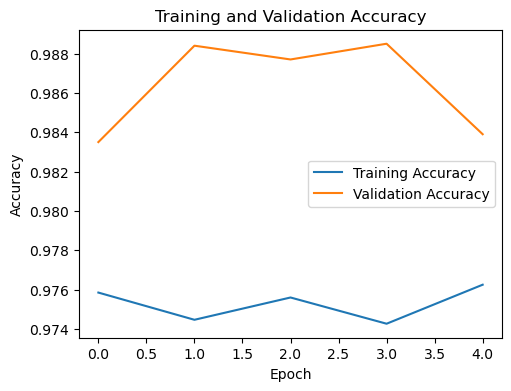

In [42]:
# Plot performance metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

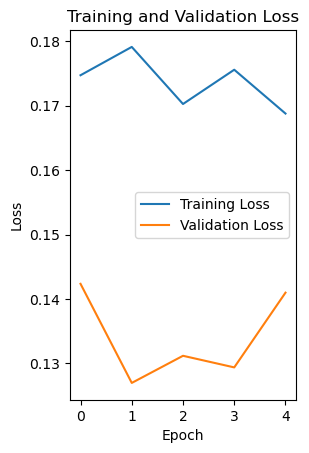

Application terminated.


In [43]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

print("Application terminated.")

In [22]:
# Evaluate the trained model on the entire test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1410 - accuracy: 0.9839
Test Loss: 0.14098355174064636
Test Accuracy: 0.9839000105857849
